In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [100]:
from google.colab import files


In [101]:
files.upload()
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d 'cherngs/heart-disease-cleveland-uci'

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
heart-disease-cleveland-uci.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

sample_data


In [102]:
import zipfile
zip_ref = zipfile.ZipFile('heart-disease-cleveland-uci.zip', 'r')
zip_ref.extractall('./')
zip_ref.close()
!ls

 heart_cleveland_upload.csv	   kaggle.json	        sample_data
 heart-disease-cleveland-uci.zip   logistic_model.pkl
'kaggle (1).json'		   random_model.pkl


In [103]:
df=pd.read_csv('heart_cleveland_upload.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
df.isnull().values.any()

False

In [104]:
df['condition']=df['condition'].astype('category')

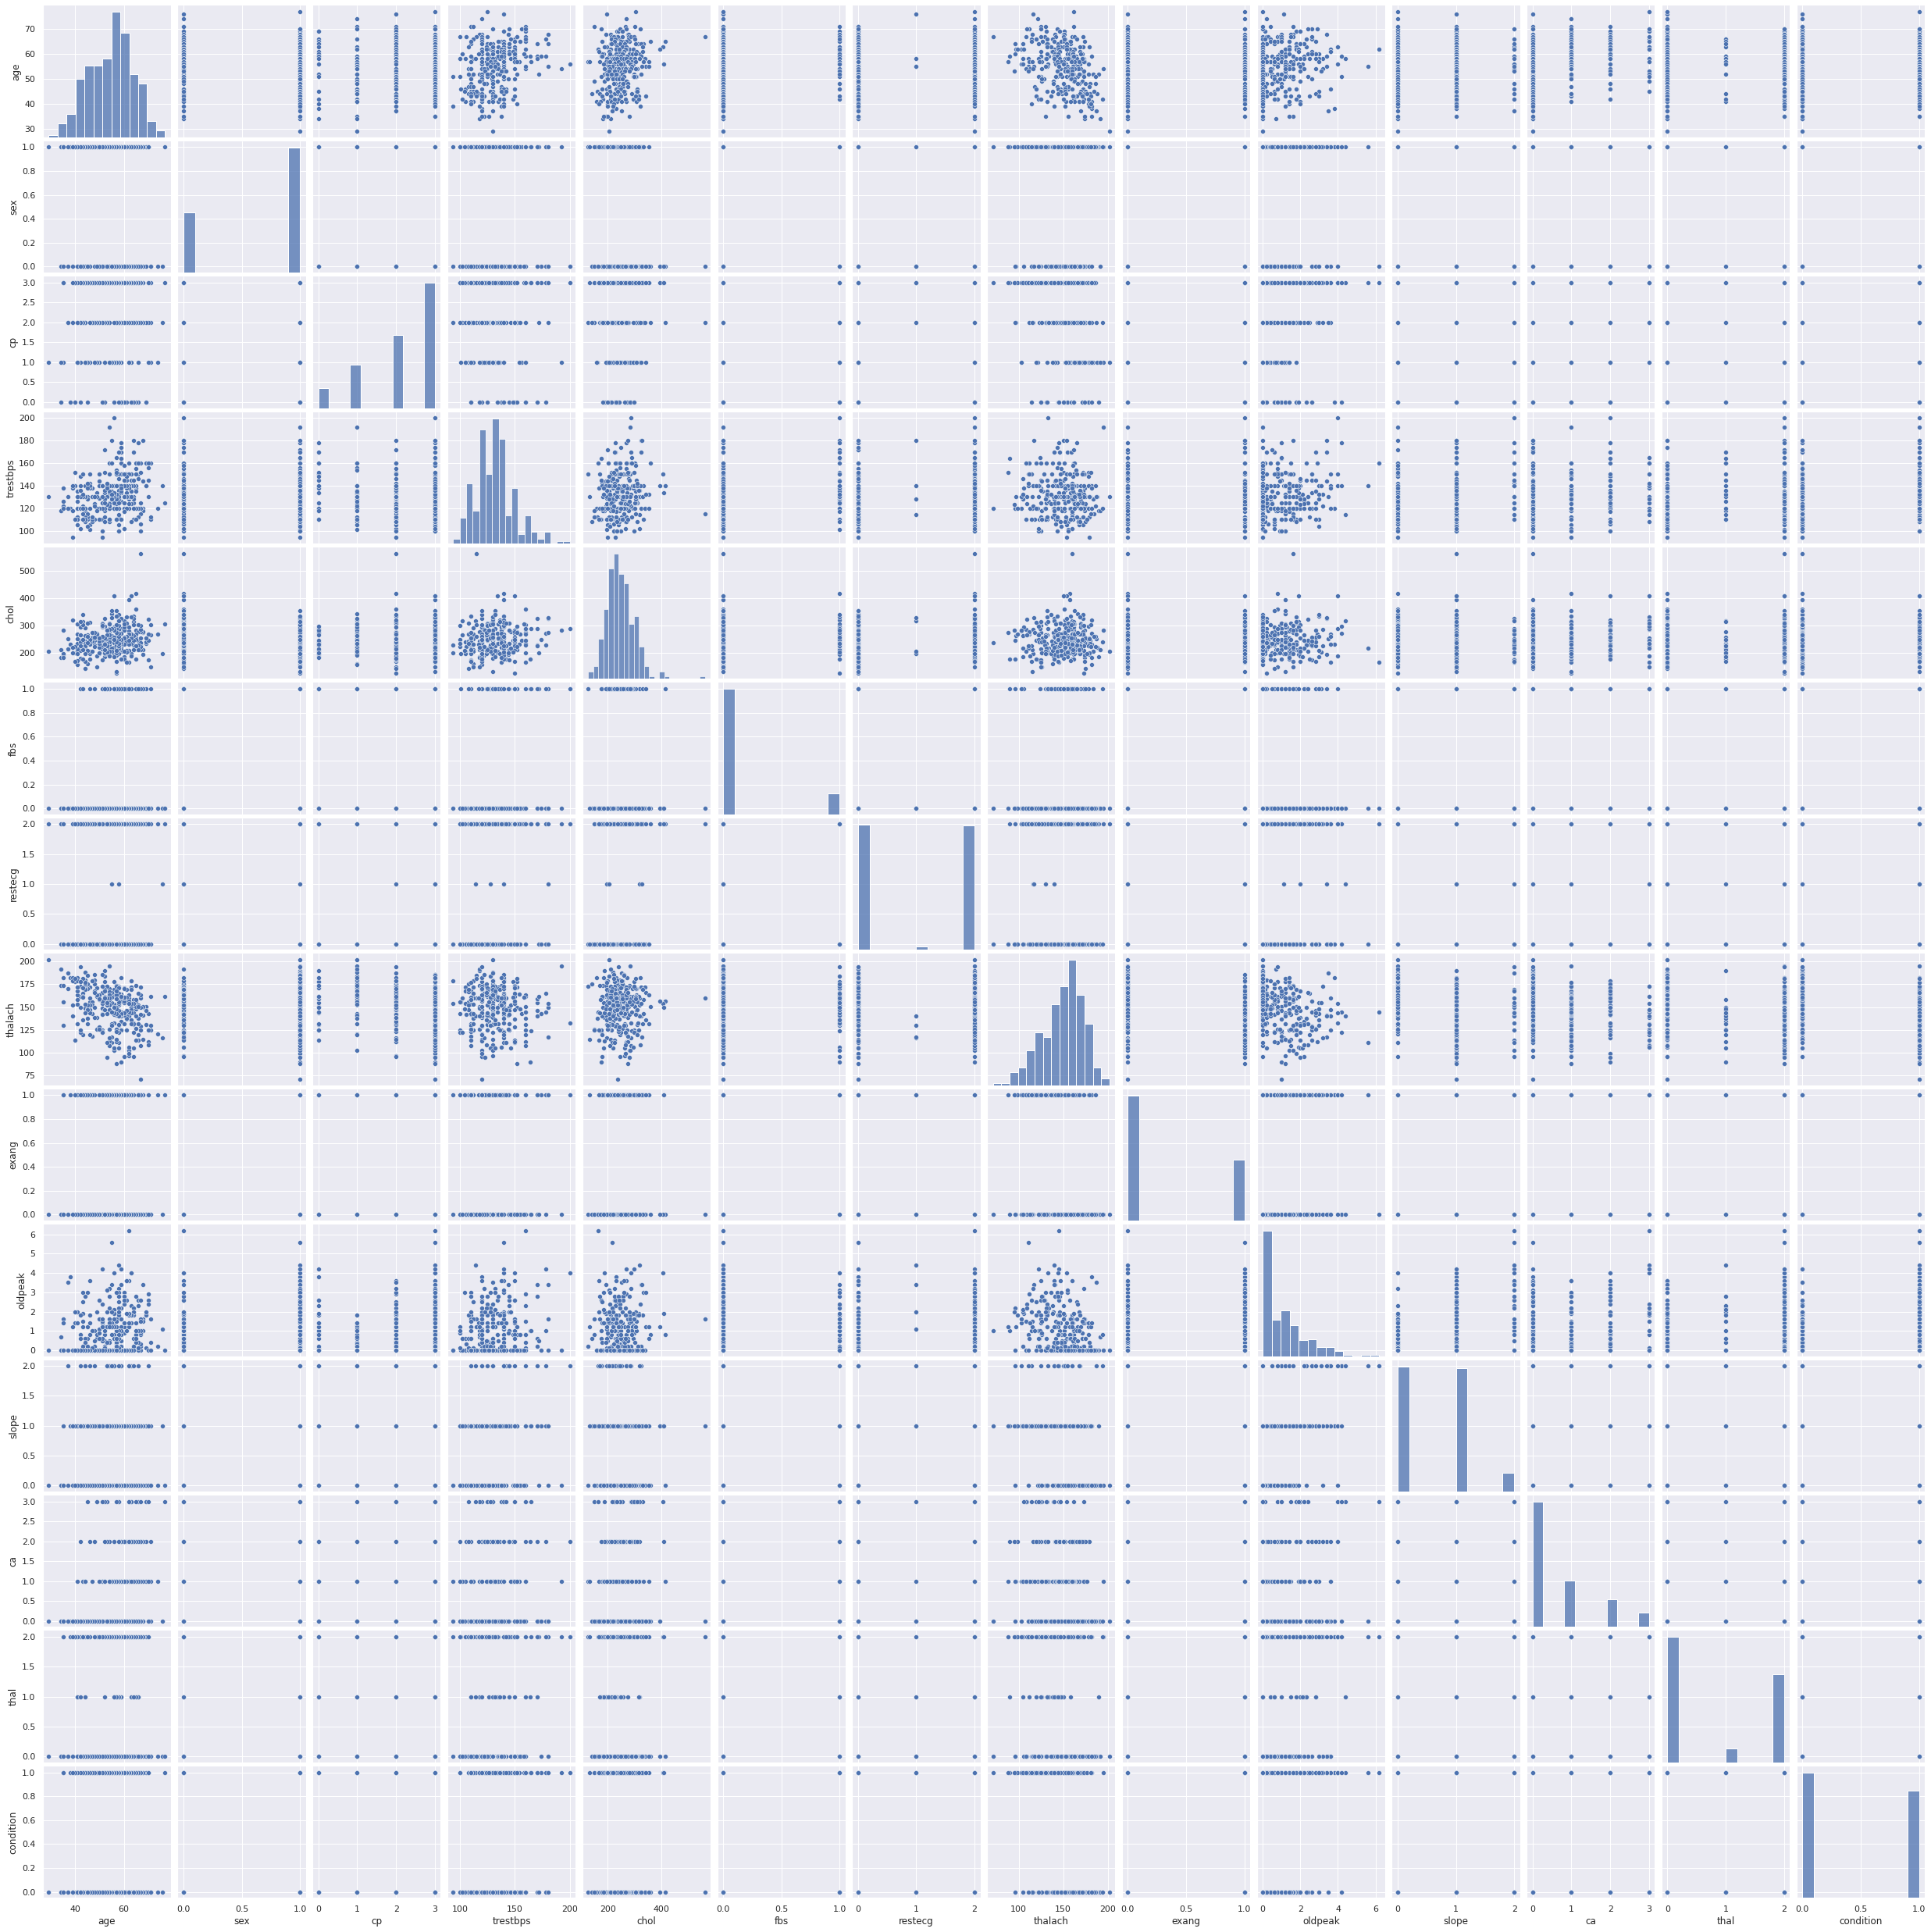

In [ ]:
sns.pairplot(df)

In [105]:
from sklearn.model_selection import train_test_split

x,y=df.iloc[:,:-1],df.iloc[:,-1:]


In [106]:
y=y.astype('int')
y.head()

,condition
0,0
1,0
2,0
3,1
4,0


In [107]:
xTrain,xTest,yTrain,yTest=train_test_split(x,y)


In [ ]:
yTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 67 to 12
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   condition  222 non-null    int64
dtypes: int64(1)
memory usage: 3.5 KB


In [108]:
from sklearn.ensemble import RandomForestClassifier
rndfrst = RandomForestClassifier(max_depth=100, random_state=0)
rndfrst.fit(xTrain, yTrain)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [109]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(xTrain,yTrain)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.score(xTest,yTest)

0.8933333333333333

In [ ]:
rndfrst.score(xTest,yTest)

0.88

In [ ]:
model.predict(xTest)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
rndfrst.predict(xTest)

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
import pickle
# save the model to disk
filename = 'logistic_model.pkl'
pickle.dump(model, open(filename, 'wb'))

filename1='random_model.pkl'
pickle.dump(rndfrst,open(filename1,'wb'))

In [ ]:
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download(filename1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [113]:
model.predict([[69,	1,	0,	160,	234,	1,	2,	131,	0,	0.1,	1,	1,	0]])

array([0])